<a href="https://colab.research.google.com/github/parkerhale/money/blob/master/demo_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import os
from google.colab import drive
from argparse import Namespace
import numpy as np
import pandas as pd
import httpimport
import torch
import torch.optim as optim
from tqdm import tqdm_notebook, tqdm
import math
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import statsmodels.formula.api as smf  # statsmodels
import statsmodels.api as sm
from numpy import genfromtxt
import csv
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
url = "https://github.com/sundeepblue/movie_rating_prediction/raw/master/movie_metadata.csv"
data = pd.read_csv(url)
data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


This dataset contains lots of information, including 9 characteristic variables, 15 numeric variables and 2 categorical variables. Before we processing feature engineering, I want to make sure data integrity so that missing values and outliers won't affect our prediction result.
The first step is 

In [58]:
data.shape

(5043, 28)

In [59]:
data.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [76]:
data['director_facebook_likes'] = data['director_facebook_likes'].fillna(0)
data['actor_1_facebook_likes'] = data['actor_1_facebook_likes'].fillna(0)
data['actor_2_facebook_likes'] = data['actor_2_facebook_likes'].fillna(0)
data['actor_3_facebook_likes'] = data['actor_3_facebook_likes'].fillna(0)

In [77]:
data_wo_useless_attributes = data.drop(columns=['color','movie_imdb_link','num_user_for_reviews','aspect_ratio'])

face number in poster is not

In [78]:
data_wo_useless_attributes = data_wo_useless_attributes.drop(columns=['facenumber_in_poster'])

In [79]:
data_numeric_cleaned = data_wo_useless_attributes.dropna(subset=['num_critic_for_reviews','duration','director_name','title_year','budget'])

In [80]:
data_categoric_cleaned = data_numeric_cleaned.dropna(subset=['director_name','actor_1_name','actor_2_name','actor_3_name','plot_keywords','content_rating','language'])

In [82]:
data_categoric_cleaned.isna().sum()

director_name                  0
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                   0
actor_1_facebook_likes         0
gross                        452
genres                         0
actor_1_name                   0
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   0
plot_keywords                  0
language                       0
country                        0
content_rating                 0
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
movie_facebook_likes           0
dtype: int64

In [108]:
gross_pred = data_categoric_cleaned[data_categoric_cleaned['gross'].isna()]
gross_train = data_categoric_cleaned.dropna(subset=['gross'])


(3811, 23)

In [122]:
fit_lm = smf.glm('gross ~ budget', gross_train).fit()
print(fit_lm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  gross   No. Observations:                 3811
Model:                            GLM   Df Residuals:                     3809
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                      4.8728e+15
Method:                          IRLS   Log-Likelihood:                -74238.
Date:                Thu, 17 Jun 2021   Deviance:                   1.8561e+19
Time:                        03:57:58   Pearson chi2:                 1.86e+19
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.063e+07   1.15e+06     43.876      0.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


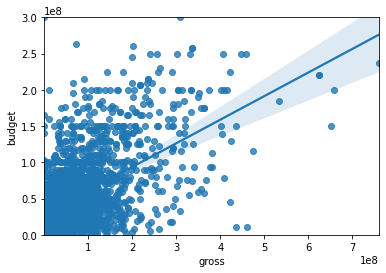

In [125]:
fig, ax = plt.subplots()
ax.set(ylim=(0, 300000000))
sns.regplot('gross', 'budget', data)

In [92]:
result = fit_lm.predict(data_categoric_cleaned['budget','title_year','imdb_score','duration'])
result

KeyError: ignored

In [94]:
data_categoric_cleaned['budget','title_year','imdb_score','duration']

0       237000000.0
1       300000000.0
2       245000000.0
3       250000000.0
5       263700000.0
           ...     
5033         7000.0
5034         7000.0
5035         7000.0
5037         9000.0
5042         1100.0
Name: budget, Length: 4263, dtype: float64